Text(0.5, 1.0, 'validation rmse versus k')

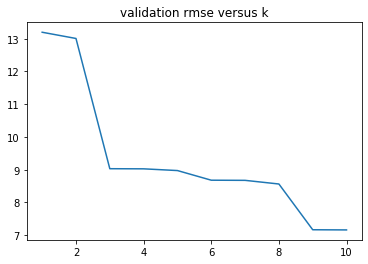

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import argparse
import pandas as pd 
from matplotlib import pyplot as plt

from operator import itemgetter

class Model(object):
    """
     Polynomial Regression.
    """

    def fit(self, X, y, k):
        """
        Fits the polynomial regression model to the training data.

        Arguments
        ----------
        X: nx1 matrix of n examples
        y: response variable vector for n examples
        k: polynomial degree
        """
        phi = np.ones((X.shape[0], k+1))
        
        for i in range(k+1):
            phi[:,i]= np.power(X, i)
        self.w = np.linalg.inv(phi.T @ phi) @ phi.T @ y
        return self.w

    def predict(self, X):
        """
        Predicts the dependent variable of new data using the model.

        Arguments
        ----------
        X: nx1 matrix of n examples

        Returns
        ----------
        response variable vector for n examples
        """
        phi = np.ones((X.shape[0], len(self.w)))
        for i in range(len(self.w)):
            phi[:,i]= np.power(X, i)
        return  phi @ self.w

    def rmse(self, X, y):
        """
        Returns the RMSE(Root Mean Squared Error) when the model is validated.
        
        Arguments
        ----------
        X: nx1 matrix of n examples
        y: response variable vector for n examples
        
        Returns
        ----------
        RMSE when model is used to predict y
        """
        ypred = self.predict(X)
        return np.sqrt(((y - ypred) ** 2).mean())
        


#run command:
#python poly.py --data=data/poly_reg_data.csv

#if __name__ == '__main__':

#Read command line arguments
#parser = argparse.ArgumentParser(description='Fit a Polynomial Regression Model')
#parser.add_argument('--data', required=True, help='The file which contains the dataset.')
path = '/Users/Jun/Documents/18661_ML/hw2/poly_reg_data.csv'  
data =np.genfromtxt(path, delimiter=',')
#args = parser.parse_args()
#print(data)



x_train = data[1:26][:,0]
x_val = data[26:41][:,0]


y_train = data[1:26][:,1]
y_val = data[26:41][:,1]



#plot validation rmse versus k
# Your code here
loss = []
for k in range(1,11):
    model = Model()
    model.fit(x_train, y_train, k )
    rms= model.rmse(x_train, y_train)
    loss.append(rms)
plt.plot(range(1,11),loss)

plt.title("validation rmse versus k")
#plot training rmse versus k
# Your code here

#plot fitted polynomial curve versus k as well as the scattered training data points 
# Your code here


k = 9, 10 will give us the minimum training error

Text(0.5, 1.0, 'training rmse versus k')

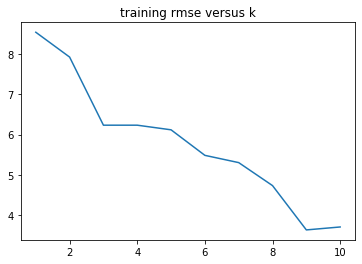

In [2]:
loss = []
for k in range(1,11):
    model = Model()
    model.fit(x_val, y_val, k )
    rms= model.rmse(x_val, y_val)
    loss.append(rms)
plt.plot(range(1,11),loss)
plt.title("training rmse versus k")

k = 9 gives us the minimum validation error

K_train and K_val are different, that might come from the difference between training and testing dataset.

Text(0.5, 1.0, 'k=1')

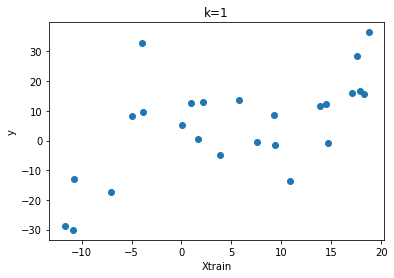

In [3]:
model = Model()
model.fit(x_train, y_train, 1 )
rms= model.rmse(x_train, y_train)
xt= model.predict(x_train)
plt.scatter(xt,y_train)
plt.xlabel("Xtrain")
plt.ylabel("y")
plt.title("k=1" )

Text(0.5, 1.0, 'k=3')

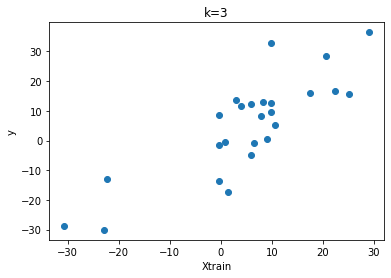

In [9]:
model = Model()
model.fit(x_train, y_train, 3 )
rms= model.rmse(x_train, y_train)
xt= model.predict(x_train)
plt.scatter(xt,y_train)
plt.xlabel("Xtrain")
plt.ylabel("y")
plt.title("k=3" )

Text(0.5, 1.0, 'k=5')

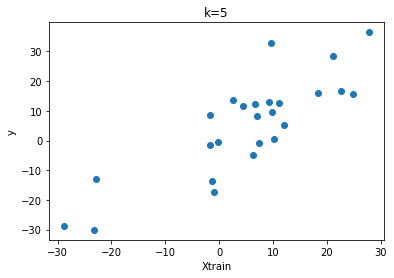

In [5]:
model = Model()
model.fit(x_train, y_train, 5)
rms= model.rmse(x_train, y_train)
xt= model.predict(x_train)
plt.scatter(xt,y_train)
plt.xlabel("Xtrain")
plt.ylabel("y")
plt.title("k=5")

Text(0.5, 1.0, 'k=10')

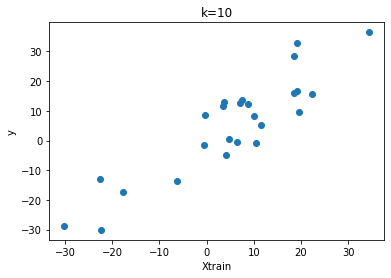

In [6]:
model = Model()
model.fit(x_train, y_train, 10 )
rms= model.rmse(x_train, y_train)
xt= model.predict(x_train)
plt.scatter(xt,y_train)
plt.xlabel("Xtrain")
plt.ylabel("y")
plt.title("k=10")